In [1]:
import numpy as np
import os
from os.path import isfile


import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

### Load song

In [2]:
dict_genres = {'Electronic':0,  'Folk':1,  'Pop' :2, 'Instrumental':3 }


reverse_map = {v: k for k, v in dict_genres.items()}
#print(reverse_map)

In [3]:
import IPython.display as ipd
files = os.listdir(os.path.join("predict"))
#print(files)

time=420
freq=128
arr_specs=list()
#X_spect = np.empty((0, time, freq))
X_spect = np.empty((0, time))
songs=[]
for fname in files:
  print(fname)
  count=0
  for index in range(18):
  
    y,sr=librosa.load(os.path.join("predict",fname),duration=10,offset=index*10)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
    spect = librosa.power_to_db(spect, ref=np.max)
    spect = spect[:freq, :time]
    spect=spect.T
    songs.append(y)
    arr_specs.append(spect)  
    X_spect=np.array(arr_specs) 
  
  
print(X_spect.shape)  

PSY - GANGNAM STYLE(강남스타일) MV.mp3
(18, 420, 128)


In [4]:
from keras.models import load_model

weights_path = 'models/crnn/last_weights.best.h5'
model_crnn = load_model(weights_path)

weights_path = 'models/parallel/last_weights.best.h5'
model_prcnn = load_model(weights_path)

weights_path = 'models/cnn/weights.best.h5'
model_cnn = load_model(weights_path)


Using TensorFlow backend.


In [5]:
x_test=X_spect

print(x_test.shape)

(18, 420, 128)


In [6]:
y_pred_crnn = model_crnn.predict(x_test)
#print(y_pred.shape)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
y_pred_prcnn = model_prcnn.predict(x_test)
y_pred_cnn = model_cnn.predict(x_test)

In [7]:
res_list=[]
res_one=[]
#res_print[]
def pred(y_pred):
  total=0
  result={}
  count=0
  #result=[]
  for j in y_pred:
    total+=j
  for j in y_pred:  
    result[reverse_map[count]]=j/total 
    count=count+1
  labels=sorted(result.items(), key=lambda x: x[1], reverse=True)
  for x in labels[:2:]:
     res_list.append(x[0])
  #for x in labels[0:]:
    #print(x)  
  for x in labels[:1:]:
    res_one.append(x[0])

In [8]:
print("CNN prediction")
for i in y_pred_cnn:
  pred(i)
  #print("\n")

CNN prediction


In [9]:
import collections
from collections import Counter

x=list(Counter(res_list).keys())
y=list(Counter(res_list).values())

result_2=dict(zip(x, y))
result_1=dict(zip(Counter(res_one).keys(), Counter(res_one).values()))

print("Top 2 genres predicton:",result_2)
print("Top one genre prediction",result_1)

Top 2 genres predicton: {'Electronic': 18, 'Instrumental': 12, 'Pop': 6}
Top one genre prediction {'Electronic': 18}


### CRNN Prediction

In [10]:

res_list=[]
res_one=[]

print("CRNN prediction")
for i in y_pred_crnn:
  pred(i)
  #print("\n")

CRNN prediction


### Top 1,2 Genres Prediction

In [11]:
import collections
from collections import Counter

x=list(Counter(res_list).keys())
y=list(Counter(res_list).values())

result_2=dict(zip(x, y))
result_1=dict(zip(Counter(res_one).keys(), Counter(res_one).values()))

print("Top 2 genres predicton:",result_2)
print("Top one genre prediction",result_1)

Top 2 genres predicton: {'Instrumental': 6, 'Electronic': 17, 'Pop': 13}
Top one genre prediction {'Instrumental': 1, 'Electronic': 16, 'Pop': 1}


### Plot Top 2 Genres Prediction

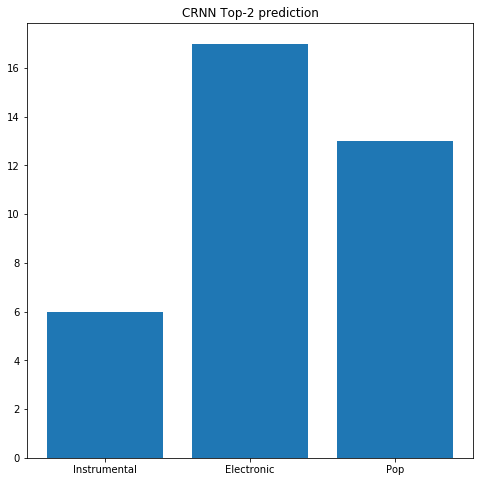

In [12]:
import matplotlib.pyplot as plt
D = result_2
plt.figure(figsize=(8,8))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("CRNN Top-2 prediction")
plt.show()

### PRCNN Prediction

In [13]:
print("PRCNN prediction")
res_list=[]
res_one=[]
for i in y_pred_prcnn:
  pred(i)
  #print("\n")

PRCNN prediction


### Top 1,2 Genres Prediction

In [14]:
from collections import Counter
import collections
x=list(Counter(res_list).keys())
y=list(Counter(res_list).values())

result_2=dict(zip(x, y))
result_1=dict(zip(Counter(res_one).keys(), Counter(res_one).values()))


print("Top 2 genres predicton:",result_2)
print("Top one genre prediction",result_1)

Top 2 genres predicton: {'Folk': 2, 'Instrumental': 11, 'Electronic': 7, 'Pop': 16}
Top one genre prediction {'Folk': 2, 'Instrumental': 3, 'Electronic': 1, 'Pop': 12}


### Plot Top 2 Genres Prediction

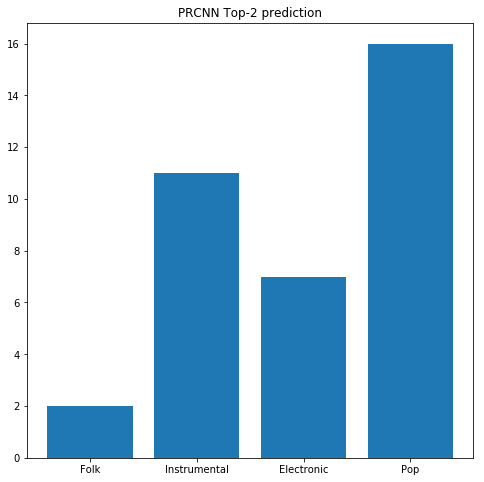

In [15]:
import matplotlib.pyplot as plt
D = result_2
plt.figure(figsize=(8,8))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("PRCNN Top-2 prediction")
plt.show()